<a href="https://colab.research.google.com/github/tecnocrata/artificial-intelligence-course/blob/master/2.deep-learning-with-python/1_tensors_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensors

# Scalar - 0D Tensors

In [1]:
# 0D Tensors
# Un escalar es un tensor  0-dimensional
# ndim = muestra el numero de axes/ejes
# ndim = 0 es un 0D Tensor
# num axes/ejes == rank

import numpy as np 
x = np.array(12) # Un tensor de un solo valor (12)
print (x)
print ('ndim=', x.ndim)
print ('shape=',x.shape)
print ('dtype=', x.dtype)

12
ndim= 0
shape= ()
dtype= int64


# Vectors - 1D Tensors

In [2]:
# Vector = Array  es un 1D Tensor
# Tiene exactamente ndim=1 eje/axis
# En este caso en particular el vector es de 4 dimensiones (por sus 4 valores en el eje 1)
x = np.array([12, 3, 6, 14]) 
print (x)
print ('ndim=', x.ndim)
print ('shape=',x.shape)
print ('dtype=', x.dtype)


[12  3  6 14]
ndim= 1
shape= (4,)
dtype= int64


# Matrices - 2D Tensors

In [3]:
# Una matriz es un tensor de 2D
# Donde ndim = 2
x = x = np.array([[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1], 
[7, 80, 4, 36, 2]])
print (x)
print ('ndim=', x.ndim)
print ('shape=',x.shape)
print ('dtype=', x.dtype)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
ndim= 2
shape= (3, 5)
dtype= int64


# 3D tensors and higher-dimensional tensors

In [4]:
x = np.array([[[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1], 
[7, 80, 4, 36, 2]], 
[[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1], 
[7, 80, 4, 36, 2]], 
[[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1], 
[7, 80, 4, 36, 2]]])
print (x)
print ('ndim=', x.ndim)
print ('shape=',x.shape)
print ('dtype=', x.dtype)

# En deep learning se llega a manipular tensores de 0D a 4D, en caso de procesamiento de videos 5D

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
ndim= 3
shape= (3, 3, 5)
dtype= int64


# Manipulating Tensors in Numpy

In [5]:
# Import keras && MNIST Data
from keras.datasets import mnist 
# Volvemos a cargar las imagenes & labes de entrenamiento, para resetear los objetos 
# luego de las modificaciones que hicimos anteriormente
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Obtiene las imagenes de entrenamiento de la 10 a la 99
my_slice = train_images[10:100] 
print (len (my_slice))
print(my_slice.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
90
(90, 28, 28)


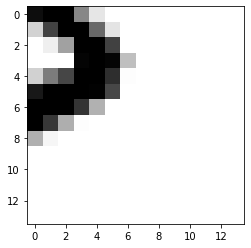

In [6]:
# Un slice mas agresivo, obtenemos los 14 x 14 pixeles del bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
# Graficamos para el primer ejemplo
digit = my_slice[0] 
import matplotlib.pyplot as plt 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [7]:
# En general el axis =0 corresponde a los ejemplos, tambien llamado "samples axis"
# Los algoritmos de deep learning no procesan los datos de un solo bloque, los dividen en bloques o batches
# Un batch de los primeros 128 ejemplos
batch = train_images[:128]
print (len (batch))

# el siguiente batch de 128
batch = train_images[128: 256]

# Generalizando... batch = train_images[128 * n:128 * (n + 1)]

128


# Broadcasting

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape(a,b,... n,n+1,... m)and the other has shape(n,n+1,... m). The broadcasting will then automatically happen for axes a through n - 1.

In [8]:
x = np.array([[3,5,6],[1,1,1]])
y=np.array([2,2,2])
z = x + y
print ('x.shape = ', x.shape)
print ('y.shape = ',y.shape)
# The output z has shape (2,3) like x.
print ('z.shape = ', z.shape)

x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10))
z = np.maximum(x, y)
print ('x.shape = ', x.shape)
print ('y.shape = ',y.shape)
# The output z has shape (64, 3, 32, 10) like x.
print ('z.shape = ', z.shape)


x.shape =  (2, 3)
y.shape =  (3,)
z.shape =  (2, 3)
x.shape =  (64, 3, 32, 10)
y.shape =  (32, 10)
z.shape =  (64, 3, 32, 10)


# Tensor Dot
Esta es la multiplicacion de matrices que conocemos

In [15]:
# El producto entre dos escalares es un escalar
print (np.dot(3, 4))
# El producto entre dos vectores es un escalar
print (np.dot([2, 3], [2, 3]))
# Aqui la implementacion 
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1])) 
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z
print

12
13
